<a href="https://colab.research.google.com/github/NoonTaha/IS-4487/blob/main/Module_13_Noon_Taha_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string

In [ ]:
df = pd.read_csv("Data_Position_Salary (3).csv")

In [ ]:
def cleanData(salary):
		salary = salary.replace(".","")
		salary = salary.replace(",","")
		salary = salary.replace("$","")
		salary = "".join(salary.split())
		return int(salary)

In [ ]:
df['SalaryUSD'] = df['SalaryUSD'].apply(lambda num : cleanData(num))

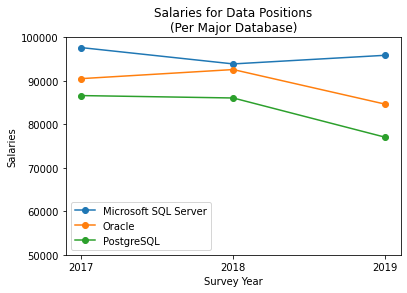

In [ ]:
fig, axes = plt.subplots(1,1) 
df1 = df.copy() 
df_databases = df1[df1['PrimaryDatabase'] == "Microsoft SQL Server"] 
df1_databases = df1[df1['PrimaryDatabase'] == "Oracle"] 
df2_databases = df1[df1['PrimaryDatabase'] == "PostgreSQL"] 
df_group = df_databases.groupby('Survey Year')['SalaryUSD'] 
df1_group = df1_databases.groupby('Survey Year')['SalaryUSD'] 
df2_group = df2_databases.groupby('Survey Year')['SalaryUSD'] 
df_mean = df_group.mean() 
df1_mean = df1_group.mean() 
df2_mean = df2_group.mean() 
axes.set_title('Salaries for Data Positions\n(Per Major Database)') 
axes.set_xticks([2017,2018,2019]) 
axes.set_ylim(ymin=50000,ymax=100000) 
axes.set_ylabel('Salaries') 
df_mean.plot(marker="o",label='Microsoft SQL Server') 
df1_mean.plot( marker='o', label='Oracle') 
df2_mean.plot(marker='o', label='PostgreSQL') 
axes.legend() 
plt.show() 

In [ ]:
df_top10 = dfgrp.mean().sort_values().tail(n=10)
df_top10

Country
New Zealand        94279.413793
Norway             95502.260870
Israel             96710.272727
Cayman Islands    100588.000000
Denmark           100890.134615
United States     111908.358173
Uganda            114500.000000
Bermuda           120000.000000
Switzerland       128915.931818
Hong Kong         179644.500000
Name: SalaryUSD, dtype: float64

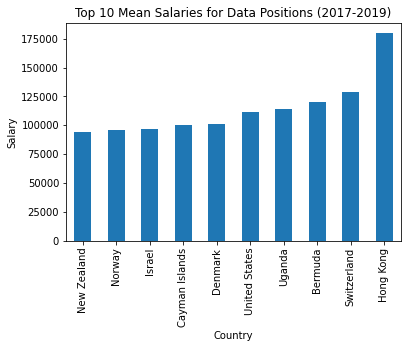

In [ ]:
fig, axs = plt.subplots(1,1)
df_top10.plot(kind='bar', x='Country', y='SalaryUSD')
axs.set_title('Top 10 Mean Salaries for Data Positions (2017-2019)')
axs.set_ylabel('Salary')
plt.show()

In [ ]:
df1 = df.copy()
df1 = df1[df1['PrimaryDatabase']!='Microsoft SQL Server']
df1 = df1[df1['PrimaryDatabase']!='Oracle']
df1 = df1[df1['PrimaryDatabase']!='Other']

In [ ]:
df1grp = df1.groupby('PrimaryDatabase')
dbcounts = df1grp['PrimaryDatabase'].count()
dbcounts

PrimaryDatabase
Amazon RDS (any flavor)    13
Azure SQL DB               24
Cassandra                   2
DB2                        16
Elasticsearch               2
Microsoft Access           15
MongoDB                     6
MySQL/MariaDB              29
PostgreSQL                 46
SAP                        11
SQLite                      4
Teradata                   11
Name: PrimaryDatabase, dtype: int64

In [ ]:
minordbs = dbcounts.sort_values().tail(n=4)
minordbs

PrimaryDatabase
DB2              16
Azure SQL DB     24
MySQL/MariaDB    29
PostgreSQL       46
Name: PrimaryDatabase, dtype: int64

In [ ]:
df_minordbs = df1[df1['PrimaryDatabase'].isin(minordbs.keys())]

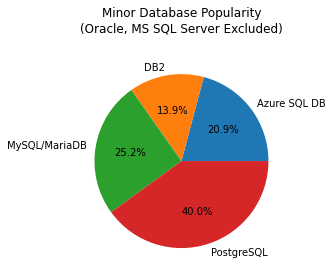

In [ ]:
fig, axs = plt.subplots()
minorcounts = df_minordbs.groupby('PrimaryDatabase')['PrimaryDatabase'].count()
minorcounts.plot(kind='pie',autopct="%.1f%%")
axs.set_ylabel('')
axs.set_title('Minor Database Popularity\n(Oracle, MS SQL Server Excluded)\n')
plt.show()